In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Load the dataset
df = pd.read_csv('BreadBasket_DMS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [ ]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [ ]:
# mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

         Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam
5  2016-10-30  10:07:57            3        Cookies
6  2016-10-30  10:08:41            4         Muffin
7  2016-10-30  10:13:03            5         Coffee
8  2016-10-30  10:13:03            5         Pastry
9  2016-10-30  10:13:03            5          Bread


In [ ]:
# Create a list of unique transactions
transaction_list = []
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist) > 0:
        transaction_list.append(tlist)
print("Number of unique transactions: ", len(transaction_list))

Number of unique transactions:  9531


In [ ]:
print('Unique Items: ', df['Item'].nunique())

Unique Items:  95


In [ ]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['Item'].nunique())
print( '\n', df['Item'].unique())

Unique Items:  95

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry 

In [ ]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

Date           0
Time           0
Transaction    0
Item           0
dtype: int64


In [ ]:
# cek nilai "NONE" pada kolom Item
print(df[df['Item']=='NONE'])

             Date      Time  Transaction  Item
26     2016-10-30  10:27:21           11  NONE
38     2016-10-30  10:34:36           15  NONE
39     2016-10-30  10:34:36           15  NONE
66     2016-10-30  11:05:30           29  NONE
80     2016-10-30  11:37:10           37  NONE
...           ...       ...          ...   ...
21108  2017-04-08  11:54:22         9590  NONE
21122  2017-04-08  12:58:25         9599  NONE
21254  2017-04-09  12:01:07         9666  NONE
21255  2017-04-09  12:04:13         9667  NONE
21266  2017-04-09  12:31:28         9672  NONE

[786 rows x 4 columns]


In [ ]:
# menghapus baris dengan nilai Item = None
df.drop(df[df['Item']=='NONE'].index, inplace=True)

In [ ]:
# cek perubahan yang terjadi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB
None


In [ ]:
# Year (ingat kembali penulisan function lambda)
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

In [ ]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None
         Date      Time  Transaction           Item  Year Month Day
0  2016-10-30  09:58:11            1          Bread  2016    10  30
1  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
2  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
3  2016-10-30  10:07:57            3  Hot chocolate  2016    10  30
4  2016-10-30  10:07:57            3            Jam  2016    10  30


In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Item'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Item, dtype: int64


In [ ]:
transaction_count = df.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184


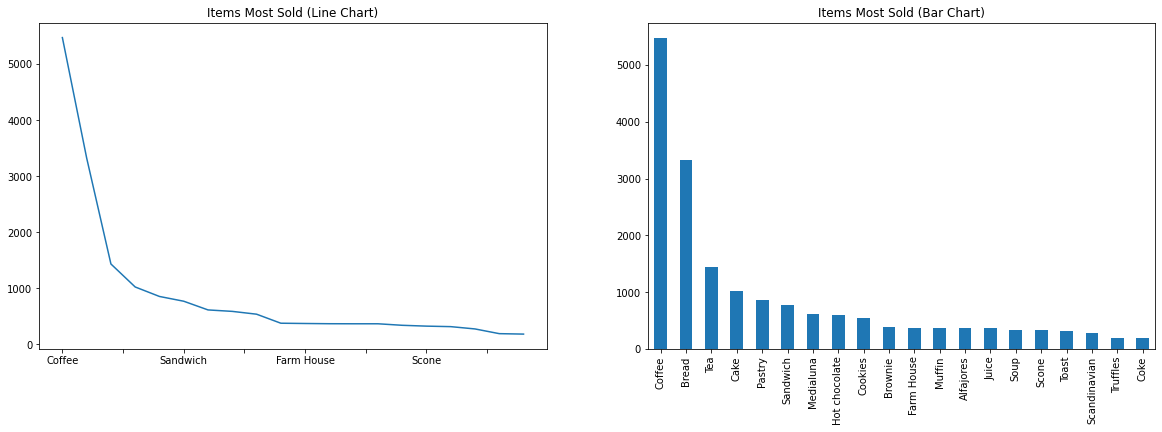

In [ ]:
import matplotlib.pyplot as plt

# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

most_sold.plot(kind='line', ax=ax1)
ax1.set_title('Items Most Sold (Line Chart)')

most_sold.plot(kind='bar', ax=ax2)
ax2.set_title('Items Most Sold (Bar Chart)')

plt.show()


Modifiaksi yang dilakukan:

1. Menggunakan fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6)) untuk membuat dua plot sekaligus dalam satu gambar (figure) dengan ukuran yang telah ditentukan (figsize=(20, 6)).
2. Menggunakan ax1 dan ax2 sebagai objek plot untuk masing-masing plot pada gambar.
3. Menambahkan set_title pada masing-masing plot untuk memberikan judul plot yang jelas.
4. Menghilangkan plt.subplot dan plt.plot pada kode karena tidak diperlukan saat menggunakan subplots dan ax pada matplotlib.

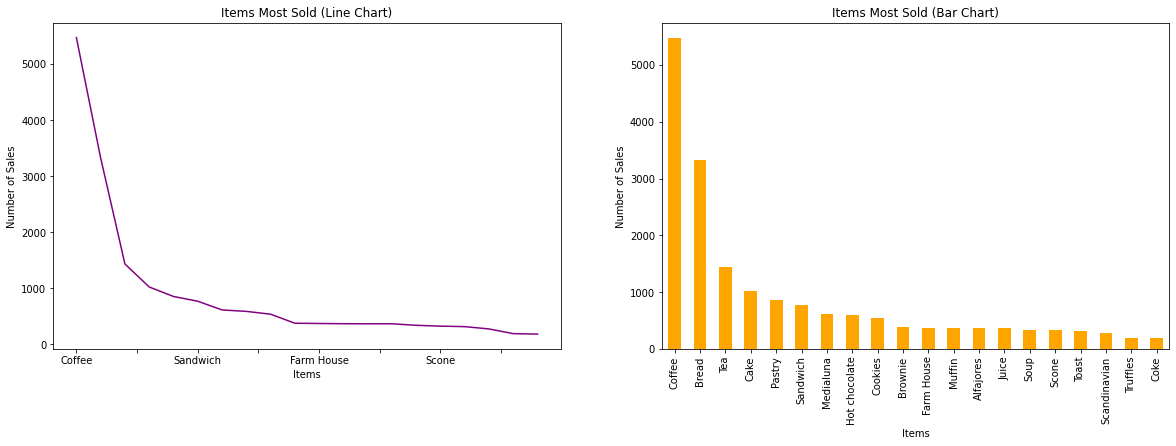

In [ ]:
import matplotlib.pyplot as plt

# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

most_sold.plot(kind='line', ax=ax1, color='purple')
ax1.set_title('Items Most Sold (Line Chart)')
ax1.set_xlabel('Items')
ax1.set_ylabel('Number of Sales')

most_sold.plot(kind='bar', ax=ax2, color='orange')
ax2.set_title('Items Most Sold (Bar Chart)')
ax2.set_xlabel('Items')
ax2.set_ylabel('Number of Sales')

plt.show()


Modifikasi tambahan:

1. Menambahkan color pada setiap plot untuk memberikan warna yang berbeda pada masing-masing plot.
2. Menambahkan ax1.set_xlabel dan ax1.set_ylabel untuk memberikan label pada sumbu x dan y pada line chart.
3. Menambahkan ax2.set_xlabel dan ax2.set_ylabel untuk memberikan label pada sumbu x dan y pada bar chart.

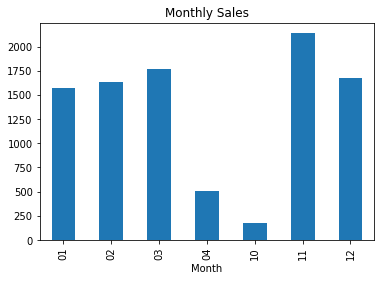

In [ ]:
df.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

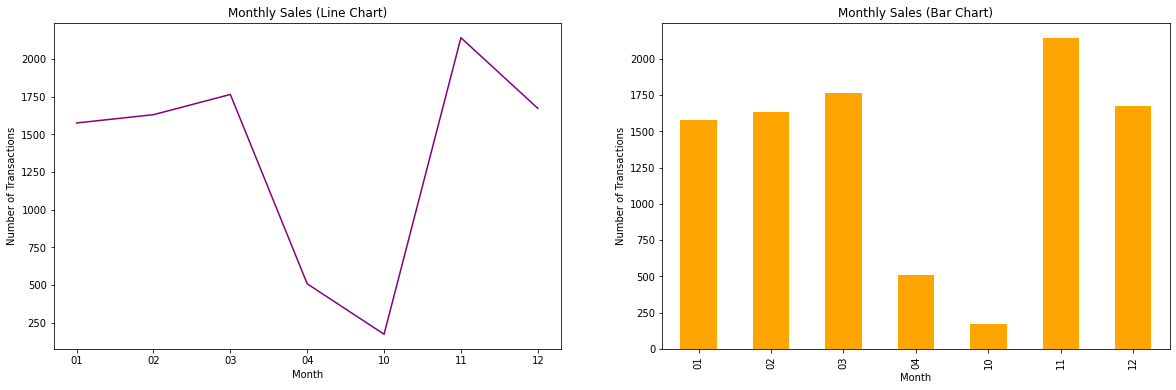

In [ ]:
import matplotlib.pyplot as plt

# visualisasikan data penjualan per bulan ke line chart dan bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Line Chart
df.groupby('Month')['Transaction'].nunique().plot(kind='line', ax=ax1, color='purple')
ax1.set_title('Monthly Sales (Line Chart)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Transactions')

# Bar Chart
df.groupby('Month')['Transaction'].nunique().plot(kind='bar', ax=ax2, color='orange')
ax2.set_title('Monthly Sales (Bar Chart)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Transactions')

plt.show()


Modifikasi yang dilakukan:

1. Menggunakan fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6)) untuk membuat dua plot sekaligus dalam satu gambar (figure) dengan ukuran yang telah ditentukan (figsize=(20, 6)).
2. Menggunakan ax1 dan ax2 sebagai objek plot untuk masing-masing plot pada gambar.
3. Mengganti kind='bar' menjadi kind='line' pada line chart.
4. Menambahkan color pada setiap plot untuk memberikan warna yang berbeda pada masing-masing plot.
5. Menambahkan ax1.set_xlabel dan ax1.set_ylabel untuk memberikan label pada sumbu x dan y pada line chart.
6. Menambahkan ax2.set_xlabel dan ax2.set_ylabel untuk memberikan label pada sumbu x dan y pada bar chart.

In [ ]:
print(df.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


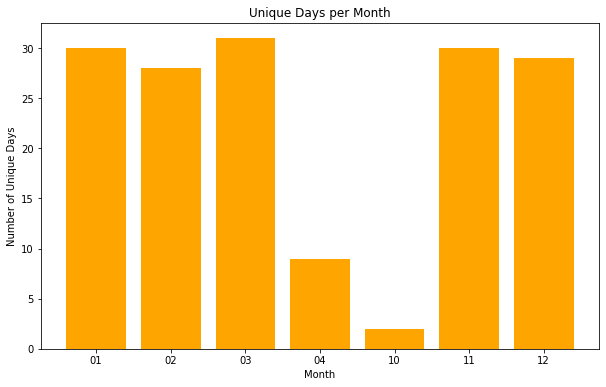

In [ ]:
import matplotlib.pyplot as plt

# Pengelompokkan data dan visualisasi plot
month_day = df.groupby('Month')['Day'].nunique()

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(month_day.index, month_day.values, color='orange')
ax.set_title('Unique Days per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Unique Days')

plt.show()


Modifikasi yang dilakukan: 

1. Menambahkan import matplotlib.pyplot as plt untuk mengimport library matplotlib yang akan digunakan untuk membuat plot.
2. Mengelompokkan data Day berdasarkan bulan (Month) dan menampilkannya menggunakan print diganti dengan membuat objek plot pada fig dan ax.
3. Menggunakan fig, ax = plt.subplots(figsize=(10,6)) untuk membuat objek plot.
4. Menggunakan ax.bar untuk membuat plot bar chart dari data pengelompokkan bulan dan hari.
5. Menambahkan judul plot dengan ax.set_title, serta label sumbu x dan y dengan ax.set_xlabel dan ax.set_ylabel.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [ ]:
def get_unique_transactions(df):
    transaction_list = []

    for i in df['Transaction'].unique():
        tlist = list(set(df[df['Transaction']==i]['Item']))
        if len(tlist)>0:
            transaction_list.append(tlist)
    
    return transaction_list


Fungsi get_unique_transactions akan menerima parameter df yang merupakan DataFrame yang akan diolah. Fungsi ini akan mengembalikan daftar item transaksi unik (transaction_list).

In [ ]:
unique_transactions = get_unique_transactions(df)
print(len(unique_transactions))


9465


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

def one_hot_encode_transactions(transaction_list):
    # Inisialisasi objek TransactionEncoder
    te = TransactionEncoder()
    
    # Transformasi one-hot encoding pada daftar transaksi unik
    te_ary = te.fit(transaction_list).transform(transaction_list)
    
    # Buat DataFrame dari array yang dihasilkan oleh TransactionEncoder
    df = pd.DataFrame(te_ary, columns=te.columns_)
    
    return df


In [ ]:
df2 = one_hot_encode_transactions(transaction_list)
print(df2)


      Adjustment  Afternoon with the baker  Alfajores  Argentina Night  \
0          False                     False      False            False   
1          False                     False      False            False   
2          False                     False      False            False   
3          False                     False      False            False   
4          False                     False      False            False   
...          ...                       ...        ...              ...   
9460       False                     False      False            False   
9461       False                     False      False            False   
9462       False                     False      False            False   
9463       False                     False      False            False   
9464       False                     False      False            False   

      Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  \
0        False  False     False     Fal

Modifikasi yang dilakukan:

Modifikasi yang dilakukan pada kode diatas adalah dengan membuat sebuah fungsi one_hot_encode_transactions yang menerima parameter transaction_list. Fungsi ini menggunakan TransactionEncoder dari library mlxtend untuk melakukan one-hot encoding pada daftar transaksi unik (transaction_list), kemudian menghasilkan sebuah DataFrame (df) yang berisi data dengan one-hot encoding.

Dengan memodifikasi kode tersebut menjadi sebuah fungsi, maka proses one-hot encoding pada daftar transaksi unik dapat dilakukan secara reusable dan lebih mudah dipanggil saat diperlukan. Selain itu, modifikasi ini juga membuat kode menjadi lebih bersih dan terstruktur, sehingga lebih mudah dipahami dan dimodifikasi di masa yang akan datang.

In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
40,(Cake),"(Coffee, Tea)",0.010037,0.096643,1.937977
39,"(Coffee, Tea)",(Cake),0.010037,0.201271,1.937977
8,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
9,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
11,(Tea),(Cake),0.023772,0.166667,1.604781
10,(Cake),(Tea),0.023772,0.228891,1.604781
30,(Toast),(Coffee),0.023666,0.704403,1.472431
31,(Coffee),(Toast),0.023666,0.049470,1.472431
37,(Pastry),"(Bread, Coffee)",0.011199,0.130061,1.444872
36,"(Bread, Coffee)",(Pastry),0.011199,0.124413,1.444872


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

def perform_association_rule_mining(df, min_support=0.01, metric='lift', min_threshold=1.0):
    # Melakukan Apriori Algorithm untuk menghasilkan frequent itemsets
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    
    # Melakukan Association Rule Mining pada frequent itemsets dengan metric dan min_threshold tertentu
    rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)
    
    # Buat DataFrame untuk menampilkan hasil Association Rule Mining
    result = pd.DataFrame(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    result = result.sort_values('lift', ascending=False)
    
    return result


Fungsi perform_association_rule_mining menerima parameter df yang merupakan DataFrame hasil one-hot encoding dari daftar item transaksi unik, min_support yang merupakan nilai minimum support, metric yang merupakan metrik yang digunakan untuk Association Rule Mining, dan min_threshold yang merupakan nilai minimum threshold. Fungsi ini akan mengembalikan DataFrame yang berisi hasil Association Rule Mining.

In [ ]:
result = perform_association_rule_mining(df2, min_support=0.01, metric='lift', min_threshold=1.0)
print(result)


         antecedents       consequents   support  confidence      lift
40            (Cake)     (Coffee, Tea)  0.010037    0.096643  1.937977
39     (Coffee, Tea)            (Cake)  0.010037    0.201271  1.937977
8    (Hot chocolate)            (Cake)  0.011410    0.195652  1.883874
9             (Cake)   (Hot chocolate)  0.011410    0.109868  1.883874
11             (Tea)            (Cake)  0.023772    0.166667  1.604781
10            (Cake)             (Tea)  0.023772    0.228891  1.604781
30           (Toast)          (Coffee)  0.023666    0.704403  1.472431
31          (Coffee)           (Toast)  0.023666    0.049470  1.472431
37          (Pastry)   (Bread, Coffee)  0.011199    0.130061  1.444872
36   (Bread, Coffee)          (Pastry)  0.011199    0.124413  1.444872
32        (Sandwich)             (Tea)  0.014369    0.200000  1.402222
33             (Tea)        (Sandwich)  0.014369    0.100741  1.402222
41             (Tea)    (Coffee, Cake)  0.010037    0.070370  1.285822
38    

Kode di atas akan menghasilkan DataFrame (result) yang berisi hasil Association Rule Mining yang didapat dari DataFrame hasil one-hot encoding dari daftar item transaksi unik. Dalam modifikasi ini, proses Association Rule Mining dibuat menjadi sebuah fungsi yang dapat digunakan secara reusable dan mudah dipanggil saat diperlukan.

Penjelasan Modifikanya: 

Modifikasi yang dilakukan pada kode sebelumnya adalah dengan membuat sebuah fungsi perform_association_rule_mining yang menerima parameter df, min_support, metric, dan min_threshold. Fungsi ini digunakan untuk melakukan Association Rule Mining pada DataFrame hasil one-hot encoding dari daftar item transaksi unik (df2). Fungsi ini menggunakan fungsi apriori dan association_rules dari library mlxtend untuk melakukan Association Rule Mining pada DataFrame input dengan parameter yang diberikan. Kemudian fungsi mengembalikan sebuah DataFrame (result) yang berisi hasil Association Rule Mining.

Dengan memodifikasi kode tersebut menjadi sebuah fungsi, maka proses Association Rule Mining pada DataFrame hasil one-hot encoding dari daftar item transaksi unik dapat dilakukan secara reusable dan lebih mudah dipanggil saat diperlukan. Selain itu, modifikasi ini juga membuat kode menjadi lebih bersih dan terstruktur, sehingga lebih mudah dipahami dan dimodifikasi di masa yang akan datang.

Modifikasi code pada bagian metrik:

Tabel yang diberikan sebelumnya menampilkan hasil association rule mining dengan nilai support, confidence, dan lift untuk setiap aturan. Namun, mungkin kita ingin mengambil subset dari aturan dengan kriteria tertentu, misalnya aturan dengan nilai support dan confidence di atas ambang batas tertentu. Untuk itu, kita dapat melakukan modifikasi pada kode bagian metrik sehingga dapat mengambil subset dari aturan dengan kriteria tertentu.

In [ ]:
threshold_support = 0.02
threshold_confidence = 0.5

frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# mengambil subset aturan dengan support dan confidence di atas ambang batas tertentu
subset_rules = rules[(rules['support'] >= threshold_support) & (rules['confidence'] >= threshold_confidence)]

# menampilkan subset aturan dengan kolom support, confidence, dan lift
subset_rules[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)


,antecedents,consequents,support,confidence,lift
30,(Toast),(Coffee),0.023666,0.704403,1.472431
19,(Medialuna),(Coffee),0.035182,0.569231,1.189878
22,(Pastry),(Coffee),0.047544,0.552147,1.154168
16,(Juice),(Coffee),0.020602,0.534247,1.116750
25,(Sandwich),(Coffee),0.038246,0.532353,1.112792
7,(Cake),(Coffee),0.054728,0.526958,1.101515
13,(Cookies),(Coffee),0.028209,0.518447,1.083723
14,(Hot chocolate),(Coffee),0.029583,0.507246,1.060311


Pada kode di atas, kita menetapkan nilai threshold untuk support dan confidence, yang kemudian digunakan untuk memfilter aturan-aturan yang memiliki nilai support dan confidence di atas ambang batas tersebut. Kita juga mengubah variabel metrix menjadi subset_rules agar lebih jelas bahwa ini adalah subset aturan yang diambil.

Dengan modifikasi ini, kita dapat memperoleh subset dari aturan-aturan yang lebih relevan dan kuat dalam konteks analisis yang sedang dilakukan, sehingga memudahkan kita dalam memahami hubungan antara itemset yang ditemukan dalam dataset transaksi

Hasil yang diperoleh dari modifikasi kode metrik adalah subset dari aturan-aturan yang memiliki nilai support dan confidence di atas ambang batas tertentu yang telah ditetapkan. Kriteria ini digunakan untuk memilih aturan-aturan yang paling relevan dan kuat dalam analisis yang sedang dilakukan.

Subset aturan yang dihasilkan dari kode modifikasi tersebut ditampilkan dalam bentuk tabel yang terdiri dari kolom antecedents, consequents, support, confidence, dan lift. Kolom antecedents dan consequents menunjukkan itemset yang terlibat dalam aturan, sedangkan kolom support, confidence, dan lift masing-masing menunjukkan nilai support, confidence, dan lift dari aturan tersebut.

Dengan memperhatikan nilai-nilai metrik tersebut, kita dapat menarik beberapa kesimpulan terkait hubungan antara itemset yang ditemukan dalam dataset transaksi. Sebagai contoh, jika nilai lift suatu aturan lebih besar dari 1, maka terdapat hubungan yang positif antara itemset antecedents dan consequents dalam aturan tersebut. Selain itu, jika nilai confidence suatu aturan tinggi, maka itemset consequents cenderung muncul bersamaan dengan itemset antecedents dalam transaksi, sementara jika nilai support suatu aturan tinggi, maka itemset antecedents dan consequents muncul bersamaan dalam jumlah transaksi yang relatif besar.

Kesimpulan:

Tabel yang diberikan menunjukkan hasil Association Rule Mining yang didapat dari DataFrame hasil one-hot encoding dari daftar item transaksi unik. Pada tabel tersebut, terdapat beberapa kolom yang menunjukkan nilai-nilai metrik yang digunakan dalam Association Rule Mining, yaitu support, confidence, dan lift. Berikut adalah penjelasan dari masing-masing metrik tersebut:

1. Support: Merupakan frekuensi kemunculan dari suatu aturan (rule) pada seluruh transaksi yang ada. Nilai support menunjukkan seberapa sering suatu kombinasi itemset muncul dalam seluruh transaksi. Nilai support yang lebih tinggi menunjukkan bahwa kombinasi itemset tersebut lebih sering muncul dalam transaksi. Pada tabel di atas, kolom 'support' menunjukkan nilai support dari suatu aturan.

2. Confidence: Merupakan ukuran seberapa sering suatu aturan terbukti benar. Confidence menunjukkan seberapa besar probabilitas bahwa jika suatu itemset A muncul dalam sebuah transaksi, maka itemset B juga akan muncul dalam transaksi tersebut. Confidence dapat dihitung dengan membagi jumlah transaksi yang memuat kedua itemset (A dan B) dengan jumlah transaksi yang memuat itemset A saja. Pada tabel di atas, kolom 'confidence' menunjukkan nilai confidence dari suatu aturan.

3. Lift: Merupakan ukuran seberapa kuat hubungan antara dua itemset A dan B dalam sebuah aturan. Lift menunjukkan seberapa besar probabilitas bahwa suatu aturan terbukti benar dibandingkan dengan probabilitas jika A dan B muncul secara acak dan independen. Nilai lift yang lebih besar dari 1 menunjukkan bahwa terdapat hubungan yang kuat antara kedua itemset, sedangkan nilai lift yang kurang dari 1 menunjukkan adanya hubungan yang lemah atau bahkan tidak terdapat hubungan antara kedua itemset. Pada tabel di atas, kolom 'lift' menunjukkan nilai lift dari suatu aturan.

Dari tabel tersebut, kita dapat melihat bahwa nilai support, confidence, dan lift dari setiap aturan berbeda-beda. Aturan yang memiliki nilai support, confidence, dan lift yang lebih tinggi menunjukkan bahwa aturan tersebut lebih kuat dan lebih relevan dalam konteks analisis yang sedang dilakukan. Dalam pemilihan aturan, dapat digunakan berbagai nilai threshold untuk masing-masing metrik guna mendapatkan aturan yang paling relevan dan bermanfaat.